# Team Streprogen



## Project 1: Analysis of Twin-Cities Traffic Flow




#### **Team Members:**
-  Dave Kreitzer
-  Xander Roy
-  Yongjin Jiang
-  Jeff Olson








### ***U of MN / Trilogy Data Analytics & Visualization Boot Camp***
#### 10/15/2018

In [8]:
%%html
<img src="Images/Python_Packages_Image.png",width=600,height=800>




<strong>Streprogen </strong> (short for <strong>Stre</strong>ngh <strong>Pro</strong>gram <strong>Gen</strong>erator) is a <strong> python</strong> package which allows the user to easily create dynamic, flexible strength training programs.




## Project Sections:

#### -  Objective
#### -  Resources
#### -  Types of Data and Challanges
#### -  Bot / Data Collection
#### -  Map Generation
#### -  Incident Analysis
#### -  35W Rush Hour Analysis
#### -  Dwnt MPLS Traffic Analysis
#### -  Conclusion



# Objective

## The assignment was to research something that we could obtain a large amount of data and use Jupyter Notebook to analyze and visualize the data.

## We decided to evaluate traffic flow in the twin cities by accessing sensor data made available by the MN Dept. of Transportation (MNDOT).

## Some of our goals included:
-  Visualizing vehicle speed and volume data in maps.
-  Analyze which major entry and exit points contribute to congestion.
-  Analyze the impact construction and accidents have on traffic speed and volume.
-  Analyze which of the major 5 entry points to downtown Minneapolis are used for various rush hours and events.

# Resources

### MNDOT Websites:
#### http://data.dot.state.mn.us/datatools/dataextract.html
#### http://data.dot.state.mn.us/iris_xml/
#### http://www.dot.state.mn.us/tmc/trafficinfo/downloads/adr.pdf




## Where does the data come from?

#### Sensors:
-  Network of 4,000+ loop and virdual detectors

#### How did we access it?
-  XMLS updated every 30 seconds with live data.
-  Java Control Panel Applet to access historical data.


#### ***Sample Maps Below***

In [13]:
%%html
<img src="Images/MNDOT_Map.PNG",width=600,height=600>

In [12]:
%%html
<img src="Images/MNDOT_Detail.PNG",width=600,height=600>

# Types of Data and Challanges

#### Live Traffic Information:
-  Speed: The average speed of the vehicles that pass in a sampling period.
-  Volume: The number of vehicles that pass through a detector in a given time period.
-  Flow: The number of vecicles that pass through a detector per hour.

#### Alerts
-  Construction, Accidents, Weather

 


####  What types of challanges did we encounter with the raw data?
-  Numerous processes to retrieve, process, sort, and read data into pandas for analyzing.
-  4,000 sensors with readings every 30 seconds = A Lot of Data!
    -  The MNDOT twin cities network can generate more than 11.5mm data points per day.
-  We decided to narrow our initial project to three specific areas:
    -  Analyze speed and volume on 35W from 694 to 494
    -  Analyze incident reporting throughout the twin cities
    -  Analyze the 5 major Highway access points to downtown MPLS


# Jupyter Notebook Dependencies

In [27]:
###########################################################################
# Import Dependencies
###########################################################################

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import matplotlib.dates as mdates
import os
import xml.etree.ElementTree as ET
import gzip
import time
import requests
from selenium import webdriver
from datetime import datetime
import folium
from IPython.display import display_html
from IPython.display import display
from ipywidgets import *
import pandas

def display_side_by_side(*args):
    html_str=''
    for df in args:
        html_str+=df.to_html()
    display_html(html_str.replace('table','table style="display:inline"'),raw=True)

## Bot / Data Collection
-  Initiall run on Heroku and team members computers

## List of Bot Functions:
-  download()
-  data_check()
-  incidents()
-  stations()
-  Route_Summary()
-  Data_Request()
-  import_summary()



#### Samples of code used below

In [2]:
###########################################################################
## List of All Functions
# download()
# data_check()
# incidents()
# stations()
# Route_Summary()
# Data_Request()
# import_summary()
# Daily_Visuals()
# Timed_Map(Datetimestring)
# grab_timed_data(DataFrame)
# mapping()
# most_recent_map()
# map_requested_time()
# Daily_PNGs()
# gif_request(date)
###########################################################################

###########################################################################
# Defenition to pull Incident Reports and Traffic Detectors from MN DOT
###########################################################################
# Request incident information - xml.gz file
# Open, decompress, and decode
# Request traffic detector information - xml.gz file
# Open, decompress, and decode

def download():
    i = requests.get('http://data.dot.state.mn.us/iris_xml/incident.xml.gz')
    with open('data/XMLs/incidents.xml', 'w') as handle:
        handle.write(gzip.decompress(i.content).decode('utf-8'))

    s = requests.get('http://data.dot.state.mn.us/iris_xml/stat_sample.xml.gz')
    with open('data/XMLs/station_sample.xml', 'w') as handle:
        handle.write(gzip.decompress(s.content).decode('ISO-8859-1'))

###########################################################################
# Defenition to convert information in DataFrames
###########################################################################
# Identify crash information, try to open csv file and convert to DF, save updated DF as csv
# Identify detector information, try to open as csv and convert to DF, save updated DF as csv



def data_check():

        try:
            with open('data/crash_data.csv', 'r') as CD:
                incidents()
        except FileNotFoundError:
                All_Crash_Data = pandas.DataFrame(columns=['Name', 'Date', 'DirectionLocation', 'Road', 'Event'])
                with open('data/crash_data.csv', 'w') as f:
                    All_Crash_Data.to_csv(f, header=True)
                    incidents()

        try:
            with open('data/station_data.csv', 'r') as CD:
                stations()
        except FileNotFoundError:
                station_data = pandas.DataFrame(columns=  ["Station","Heading", "Time","Order","Speed","Flow","Lat","Lng"])
                with open('data/station_data.csv', 'w') as f:
                    station_data.to_csv(f, header=True)
                    stations()
                    
###########################################################################
# Parse incident information and save into csv
###########################################################################

## Create lists, append lists if data exists otherwise enter NA, combine data as DF, save as csv

def incidents():
    dates = []
    incident_dirs = []
    roads = []
    locations = []
    names = []
    events = []

    XMLfile = "data/XMLs/incidents.xml"
    parsedXML = ET.parse(XMLfile)
    root = parsedXML.getroot()
    for child in root:
        try:
            dates.append(child.attrib['event_date'])
        except KeyError:
            dates.append("NA")
        try:
            names.append(str(child.attrib['name']))
        except KeyError:
            name.append("NA")
        try:
            incident_dirs.append(child.attrib['dir'])
        except KeyError:
            incident_dir.append("NA")
        try:
            roads.append(child.attrib['road'])
        except KeyError:
            roads.append('NA')
        try:
            locations.append(child.attrib['location'])
        except KeyError:
            locations.append("NA")
        try: 
            event = child.attrib['event_type'].split("_", 1)
            events.append(event[1])
        except KeyError:
            events.append("NA")


    DF = pandas.DataFrame({"Name" : names,
                       "Date" : dates,
                       "Direction": incident_dirs,
                       "Road" : roads,
                       "Location" : locations,
                       "Event" : events})


    print("Incident Data Parsed")

    with open('data/crash_data.csv', 'a') as f:
        DF.to_csv(f, header=False)
                    

In [3]:
###########################################################################
# Parse station information and save as csv
###########################################################################

## Create lists, append lists if data exists otherwise enter NA, combine data as DF, save as csv
def stations():
    stations = []
    times = []
    flows = []
    speeds = []
    order = []
    headings = []
    lats = []
    lngs = []
    with open('station_keys/Northbound_35W_StationNames.csv', 'r') as NB:
        
        NB_DF = pandas.read_csv(NB)
    with open('station_keys/Southbound_35W_StationNames.csv', 'r') as SB:
        SB_DF = pandas.read_csv(SB)
    
    XMLfile = "data/XMLs/station_sample.xml"
    parsedXML = ET.parse(XMLfile)
    root = parsedXML.getroot()
    for child in root:
    
        if child.attrib['sensor'] in NB_DF["1"].values :
            lats.append(NB_DF.loc[NB_DF['1'] == child.attrib['sensor']]['Lat'].values[0])
            lngs.append(NB_DF.loc[NB_DF['1'] == child.attrib['sensor']]['Lng'].values[0])
        
            headings.append("NB")
            order.append(NB_DF.loc[NB_DF['1'] == child.attrib['sensor']]['Order'].values[0])
            try:
                stations.append(child.attrib['sensor'])
            except KeyError:
                stations.append("NA")

            try:
                times.append(str(root.attrib['time_stamp']))
            except KeyError:
                times.append("NA")
            try:
                flows.append(child.attrib['flow'])
            except KeyError:
                flows.append("NA")

            try:
                speeds.append(child.attrib['speed'])
            except KeyError:
                speeds.append("NA")
           
        if child.attrib['sensor'] in SB_DF["1"].values:
            lats.append(SB_DF.loc[SB_DF['1'] == child.attrib['sensor']]['Lat'].values[0])
            lngs.append(SB_DF.loc[SB_DF['1'] == child.attrib['sensor']]['Lng'].values[0])
            headings.append("SB")
            order.append(SB_DF.loc[SB_DF['1'] == child.attrib['sensor']]['Order'].values[0])
            try:
                stations.append(child.attrib['sensor'])
            except KeyError:
                stations.append("NA")

            try:
                times.append(str(root.attrib['time_stamp']))
            except KeyError:
                times.append("NA")
            try:
                flows.append(child.attrib['flow'])
            except KeyError:
                flows.append("NA")

            try:
                speeds.append(child.attrib['speed'])
            except KeyError:
                speeds.append("NA")
            

    DF = pandas.DataFrame({"Station" : stations,
                       "Heading": headings,
                        "Time" : times,
                       "Order" : order,
                       "Speed" : speeds,
                       "Flow" : flows,
                      "Lat": lats,
                      "Lng" : lngs })
    with open(f'data/station_data.csv', 'w') as f:
           DF.to_csv(f, header=True)
    print("Station Data Parsed")
    
   

In [4]:
###########################################################################
# Route Summary Function
###########################################################################

def Route_Summary():
    try:
        Summary = pandas.read_csv('data/Route_Summary.csv')
    except FileNotFoundError:
        Summary = pandas.DataFrame(columns=["Heading", "Time","Order","Speed","Flow","Lat","Lng"])


        
    All_Station_Data = pandas.read_csv('data/station_data.csv')
#     All_Station_Data = All_Station_Data.set_index('Station')
    

    route = All_Station_Data.groupby('Station').head(1).index.values

    for station in route:
            Summary_partial = All_Station_Data.loc[station, 
                                                       ["Station","Heading", "Time","Order","Speed","Flow","Lat","Lng"]]
            Summary = Summary.append(Summary_partial,sort=True)
            Summary = Summary.replace("UNKNOWN",0)
            
 
    Summary = Summary.sort_values(['Station', 'Time'])
    with open('data/Route_Summary.csv', 'w') as f:
        Summary.to_csv(f,header=True, columns=["Station","Heading", "Time","Order","Speed","Flow","Lat","Lng"])
                       
    print("Summary Saved at data/Route_Summary.csv")

In [7]:
###########################################################################
# Config Def/Function
###########################################################################

def config():
    lats = []
    lngs = []
    station_list = []
        
    XMLfile = "data/XMLs/station_config.xml"
    parsedXML = ET.parse(XMLfile)
    root = parsedXML.getroot()
      

    for i in root.iter('corridor'):
        for child in i:
            try:
                station_list.append(child.attrib['station_id'])

            except KeyError:
                station_list.append("no ID")
            try:
                lats.append(child.attrib['lat'])
            except KeyError:
                 lats.append("no ID")
            try:
                lngs.append(child.attrib['lon'])
            except KeyError:
                lngs.append("no ID")



    DF = pandas.DataFrame({ "Station":station_list,
    #                        "Label":decription,
                       "Lat":lats, "Lng":lngs,})




    with open('data/station_config.csv', 'w') as f:
        DF.to_csv(f, header=True)
 

In [10]:
###########################################################################
# Identify metro sensor configurations
###########################################################################
# Request xml.gz file, decompress, decode
# with the stat_config.xml, look for a matching station. If not found, write the new station ID to stat_config.csv
try:
        config()
except FileNotFoundError:
    c = requests.get('http://data.dot.state.mn.us/iris_xml/metro_config.xml.gz')
    with open('data/XMLs/station_config.xml', 'w') as handle:
        handle.write(gzip.decompress(c.content).decode('utf-8'))
    Station_Config = pandas.DataFrame(columns=['Station', 'Lat', 'Lng'])
    with open('data/station_config.csv', 'w') as f:
        Station_Config.to_csv(f, header=True)
        config()       

In [11]:
###########################################################################
#If the program is still running, 
# Print the download is complete
# Print the Parsing is Complete
# Program sleep for 30 seconds
###########################################################################

def Data_Request():
    while True:
        download()
        data_check()
        Route_Summary()
        print("sleeping 30s")
        time.sleep(30)    

In [25]:
###########################################################################
# Import Summary Function
###########################################################################

def import_summary():
    global route_df
    global Times
    route_df= pandas.read_csv('Data/route_summary.csv')
    route_df = route_df.drop_duplicates()
    route_df = route_df.set_index("Station")
    route_df= route_df.fillna(0)
    try:
        route_df = route_df.drop("Unnamed: 0", axis=1)
    except KeyError:
        print("Everything imported correctly")
    Times = np.unique(route_df["Time"])
    
    try:
        os.mkdir(f'Results/maps/{datetime.now().strftime("%b%d")}')
    except FileExistsError:
        pass

# Map Generation

### Map Bot Functions
-  Daily_Visuals()
-  Timed_Map(Datetimestring)
-  grab_timed_data(DataFrame)
-  mapping()
-  most_recent_map()
-  map_requested_time()
-  Daily_PNGs()
-  gif_request(date)

#### Samples of code used below

In [13]:
###########################################################################
# Daily Visuals Function
###########################################################################

def Daily_Visuals():
    start_time = datetime.now().strftime("%b%d_%H_%M_%S")
    route_timed = route_df.reset_index().set_index(["Time"])
    print(f"Starting Visualization at {start_time}")
    for time in Times:
        Timed_Map(time)
    end_time = datetime.now().strftime("%b%d_%H_%M_%S")
    print(f"Visualization completed at {end_time}")
    print(f"It took {end_time} - {start_time} to complete")

In [14]:
###########################################################################
# Timed Map Function
###########################################################################

def Timed_Map(Datetimestring):
    global in_time
    in_time = Datetimestring
    in_time = ''.join(in_time.split()[1:4]).replace(":", "_")
    route_timed_in = route_df.reset_index().set_index(["Time"])
    route_timed = route_timed_in.loc[[Datetimestring]]
    route_timed_out = route_timed.reset_index().set_index(["Station"])
    grab_timed_data(route_timed_out)

In [27]:
###########################################################################
# Grab Timed Data Function
###########################################################################

def grab_timed_data(DataFrame):
    global Results_List
    global ResultsNB
    global ResultsSB
    route = DataFrame.groupby('Station').head(1).index.values
    Results = {}

    for station in route:
        try:
            Flow =  float(DataFrame.loc[station,'Flow'])
            Speed = int(DataFrame.loc[station,'Speed'])
            Lng = DataFrame.loc[station,'Lng']
            Lat = DataFrame.loc[station,'Lat']
            Order = DataFrame.loc[station,'Order'].astype(dtype="int")
            Heading = DataFrame.loc[station,'Heading']
        



            Results.update({station : {'Station' :station,
                "Heading" : Heading,
                "Order" : Order,
                "Current Speed" : Speed,
                "Current Flow" : Flow,
        
                "Lat":Lat, 
                "Lng":Lng}})


        except ValueError as v:
            print(f"{station} {v}")
    Results = pandas.DataFrame(Results).T
    Results = Results.sort_values(['Heading', 'Order'])
    Results = Results.set_index(['Heading', 'Order'], drop=True)
    Results.head()
    ResultsNB = Results.xs('NB', level='Heading')
    ResultsSB = Results.xs('NB', level='Heading')
    Results_List= {"NB":ResultsNB,"SB":ResultsSB}
    mapping()

In [16]:
###########################################################################
# Mapping Function
###########################################################################


def mapping():
            
    global folium_map
    for result in Results_List:

        x = int(len(Results_List[result]['Station']) / 2)

        folium_map = folium.Map((Results_List[result].iloc[x, 2],ResultsNB.iloc[x,3]),

                                zoom_start=11,
                                 tiles="CartoDB positron")
        Features = []
        Last_Sensor = []
        for index, row in Results_List[result].iterrows():
            if row['Current Speed'] < 15:
                color = "#ff0000"
            elif row['Current Speed'] >= 15 and row['Current Speed'] < 30:
                color =  "#ffa500"
            elif row['Current Speed'] >= 30 and row['Current Speed'] < 55:
                color = "#ffff00"
            else:
                color = "#008000"

            weight = row['Current Flow'] / 200
            if row['Current Flow'] == 0:
                weight = 1
                color = "#808080"




            Current_Sensor = (row['Lat'], row['Lng'])

            if Last_Sensor == [] :
                Last_Sensor = (row['Lat'], row['Lng'])
            else:
                if row['Current Flow'] != 0:
                    weight = row['Current Flow'] / 200

                folium.PolyLine([Current_Sensor,Last_Sensor],
                 weight=weight,color=color,
                                popup=f"Time:{timenow} Speed:{row['Current Speed']} Flow: {row['Current Flow']}").add_to(folium_map)

                Last_Sensor = (row['Lat'], row['Lng'])

            folium.CircleMarker(location=(Current_Sensor),
                                radius=3,
                                popup=("station ="  + row['Station']), fill=False).add_to(folium_map)

        folium_map.save(f"results/maps/routemap_temp.html")
        print(f'Map saved at results/maps/routemap_temp.html')
        delay=7
        fn=f'results/maps/routemap_temp.html'
        tmpurl='file://{path}/{mapfile}'.format(path=os.getcwd(),mapfile=fn)

        browser = webdriver.Firefox()
        browser.get(tmpurl)
        #Give the map tiles some time to load
        time.sleep(delay)
        try: 
            browser.save_screenshot(f'results/maps/{datetime.now().strftime("%b%d")}/{result}/{result}routemap{in_time}.png')
            print(f'Map Converted -->> results/maps/{datetime.now().strftime("%b%d")}/{result}/{result}routemap{in_time}')
        except NameError:
            
            browser.save_screenshot(f'results/maps/{datetime.now().strftime("%b%d")}/{result}/{result}routemap{timenow}.png')
            print(f'Map Converted -->> results/maps/{datetime.now().strftime("%b%d")}/{result}/{result}routemap{timenow}')
        browser.quit()

In [17]:
timenow = datetime.now().strftime("%b%d_%H_%M_%S")

In [18]:
###########################################################################
# Most Recent Map Function
###########################################################################
def most_recent_map():
    download()
    data_check()
    Route_Summary()
    import_summary()
    recent_data = route_df.groupby('Station').last()
    grab_timed_data(recent_data)
    folium_map

###########################################################################
# Map Request Function
###########################################################################

def Map_Request_Timed(Timestring):
    import_summary()
    Timed_Map(Timestring)

###########################################################################
# Daily PNG Function
###########################################################################

def Daily_PNGs():
    import_summary()
    Daily_Visuals()


In [19]:
###########################################################################
# GIF Request Function
###########################################################################
    
def gif_request(date):
    ##format is oct01##
    NBpngs = str(os.listdir(f"Results/Maps/{date}/NB"))
    SBpngs = str(os.listdir(f"Results/Maps/{date}/SB"))
    NBpngs = NBpngs.replace("'","")
    NBpngs = NBpngs.replace(",","")
    SBpngs = SBpngs.replace("'","")
    SBpngs = SBpngs.replace(",","")
    print("COPY THIS INTO TERMINAL AT NBpngs Folders")
    directions = f"convert -loop 0 -delay 60 {NBpngs} NBMap.gif\n\n"
    directions = directions.replace("[","")
    directions = directions.replace("]","")
    print(directions)
    directions = directions.replace("NB","SB")

    print(directions)

In [ ]:
###########################################################################
# Most Recent Map
###########################################################################
# most_recent_map()
# gif_request('oct11')
# Daily_PNGs()

In [110]:
%%html
<center><strong>HWY 35W North (494 to 694) 10/11/18 6:00 - 6:30 PM</strong><br>
<strong>Volume of Traffic</strong><center>
<img src="Images/35W_NB_GIF.gif",width=600,height=600>


In [109]:
%%html
<h1><center><Strong>Incident Analysis</Strong></h1>

<center><img src="Images/Incident_overview_image.PNG",width=400,height=300>

In [29]:
###########################################################################
# Importing Live Data for Incident Analysis
###########################################################################

# Import CSV files into a data frame
Crash_Data_df = pd.read_csv("Data/crash_data_2.csv",encoding='utf-8')
                            
#split date column
Crash_Data_df[["Day", "Month", "DayNum","Time","Zone","Year"]] = Crash_Data_df["Date"].str.split(" ", n = 6, expand = True) 

#define max and min dates
d_max=Crash_Data_df["Date"].min()
d_min=Crash_Data_df["Date"].max()

#split name column
Crash_Data_df[["A","B"]] = Crash_Data_df["Name"].str.split("_|2018100", n = 2, expand = True) 

#Drop time zone
Crash_Data_df.drop(['Zone'], axis = 1, inplace = True)
Crash_Data_df.reset_index(drop=True)

# group by unnamed column
Crash_Data_df = Crash_Data_df.loc[Crash_Data_df['Unnamed: 0'] == 0, :]

#del columns
del Crash_Data_df['Unnamed: 0']
del Crash_Data_df['Name']
del Crash_Data_df['A']

Crash_Data_df = Crash_Data_df.loc[Crash_Data_df['B'] != 9954815, :]

Crash_Data_df = Crash_Data_df.dropna(how='any')
Crash_Data_df.drop_duplicates(subset=['Time'], keep=False)
Crash_Data_df.sort_values(by=['B'])
Crash_Data_df.reset_index(drop=True)
Crash_Data_df = Crash_Data_df.rename(columns={'B':'ID','Date':'DATE','Direction':'DIRECTION','Road':'ROAD','Location':'LOCATION','Event':'EVENT','Day':'DAY','Month':'MONTH','DayNum':'DAYNUM','Time':'TIME','Year':'YEAR'})

Crash_Data_df.set_index('ID', inplace=True,drop=True)

Crash_Data_df.to_csv("Data/crash_data_check.csv", index=False, header=True)
Crash_Data_df.drop_duplicates()

Crash_Data_df.groupby("ID").filter(lambda x: len(x) > 1)

Crash_Data_df.to_csv("Data/crash_data_filtered.csv", index=True, header=True)

######################################################################################################

Crash_Data = "Data/crash_data_filtered.csv"
Crash_Data_df = pd.read_csv(Crash_Data)
Crash_Data_df.drop_duplicates(subset=['DAYNUM'][0], keep=False)
#Crash_Data_df.drop_duplicates(subset=['TIME'], keep=False, inplace=True)
Crash_Data_df.head(3)

######################################################################################################

Crash_Data = "Data/crash_data_filtered.csv"
Crash_Data_df = pd.read_csv(Crash_Data)
Crash_Data_df.head(2)

,ID,DATE,DIRECTION,ROAD,LOCATION,EVENT,DAY,MONTH,DAYNUM,TIME,YEAR
0,9954815,Sun Oct 07 03:35:22 CDT 2018,WB,T.H.62,@ T.H.100 NB,CRASH,Sun,Oct,7,03:35:22,2018
1,9954815,Sun Oct 07 03:35:22 CDT 2018,WB,T.H.62,@ T.H.100 NB,CRASH,Sun,Oct,7,03:35:22,2018


In [ ]:
###########################################################################
# BUG WITH MACRO - NEEDS TO BE FIXED STILL

#Crash_Data_df.dtypes
import win32com.client 

run_xl = win32com.client.Dispatch('Excel.Application')
run_xl.Workbooks.Open('Data/CrashDataFilterMacro.xlsm')
run_xl.Application.Run("Macro1")
run_xl.Application.Quit()
 
#PRINT FINAL COMPLETED MESSAGE#
print("Macro refresh completed!")
###########################################################################
# BUG - This needs to be fixed once the macro is fixed.
# right now all the incident visuals are referencing the un-macro'd data
###########################################################################

Crash_Data = "Data/crash_data_filtered.csv"
Crash_Data_df = pd.read_csv(Crash_Data)
Crash_Data_df.head(2)

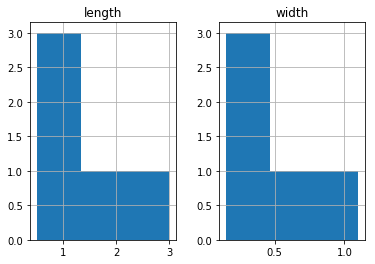

In [30]:
###########################################################################
# Length and width of datafram? Need to ask Jeff about this one
###########################################################################
df = pd.DataFrame({
...     'length': [1.5, 0.5, 1.2, 0.9, 3],
...     'width': [0.7, 0.2, 0.15, 0.2, 1.1]
...     }, index= ['pig', 'rabbit', 'duck', 'chicken', 'horse'])
>>> hist = df.hist(bins=3)

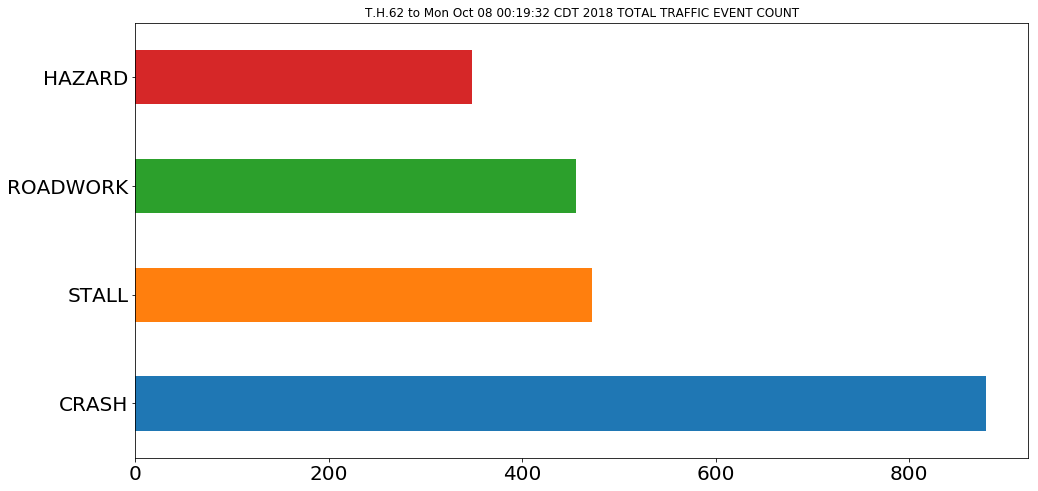

In [31]:
###########################################################################
# Incident Count for HWY 62, 10/8/18
###########################################################################
fontsize2use = 15

fontprop = fm.FontProperties(size=fontsize2use)
fig = plt.figure(figsize=(20,10))
plt.xticks(fontsize=fontsize2use)  
plt.yticks(fontsize=fontsize2use)

Crash_Data_df['EVENT'].value_counts().plot(kind='barh',  title=(f'{d_min} to {d_max} TOTAL TRAFFIC EVENT COUNT'), fontsize=20, stacked=True, figsize=[16,8])

plt.savefig("Images/Event_Count_Summary.png")
plt.show()

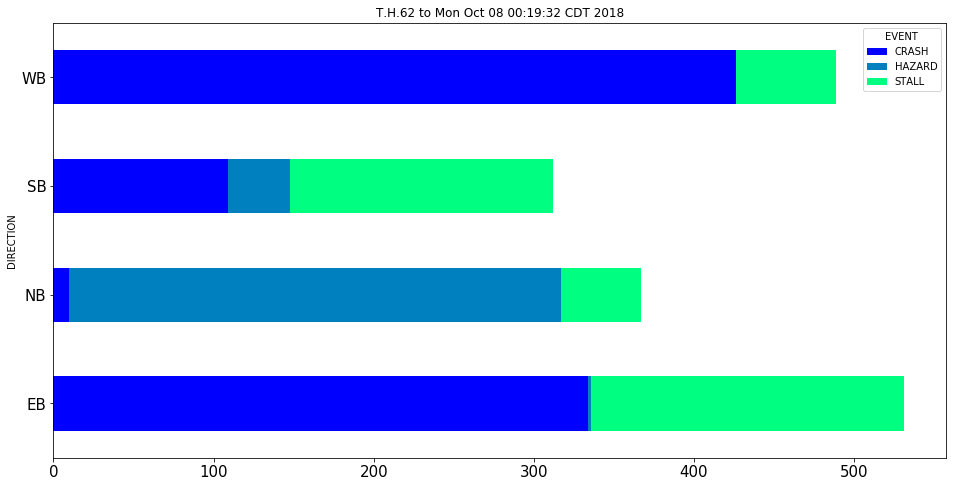

In [32]:
###########################################################################
# Incident count for HWY 62 without roadwork incidents
###########################################################################

Omit_ROADWORK_Crash_Data_df = Crash_Data_df.loc[Crash_Data_df["EVENT"] != "ROADWORK", :]
flights_by_carrier = Omit_ROADWORK_Crash_Data_df.pivot_table(index='DIRECTION', columns='EVENT', values='DAY', aggfunc='count')
flights_by_carrier.plot(kind='barh', stacked=True,fontsize=15, title=(f'{d_min} to {d_max}'), figsize=[16,8], colormap='winter')

plt.savefig("Images/Crash_Hazards_Stalls_Count.png")

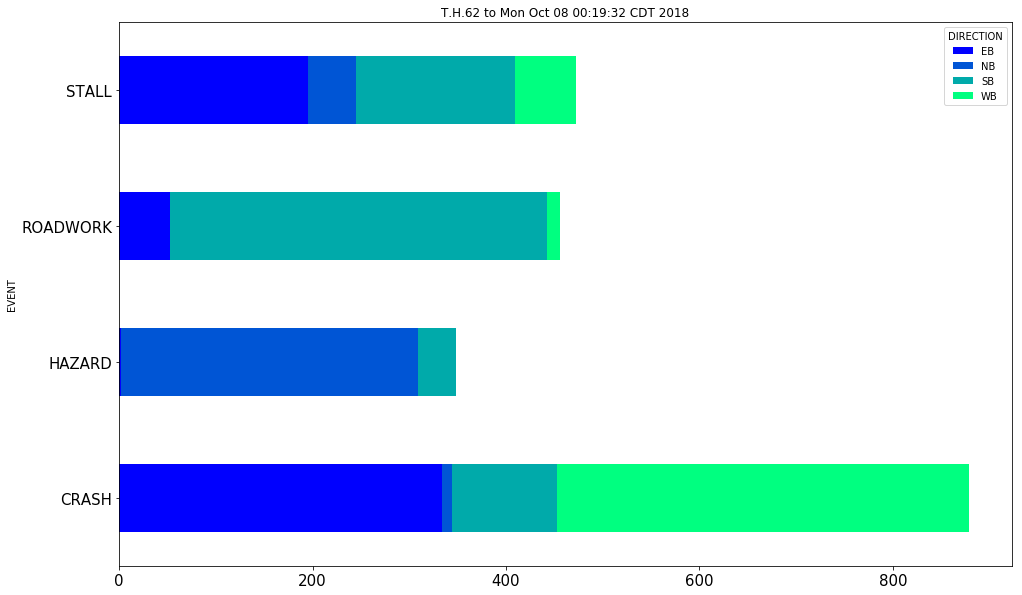

In [26]:
###########################################################################
# Incident counts for HWY 62
###########################################################################

flights_by_carrier = Crash_Data_df.pivot_table(index='EVENT', columns='DIRECTION', values='DAY', aggfunc='count')
flights_by_carrier.plot(kind='barh', stacked=True, title=(f'{d_min} to {d_max}'),fontsize=15, figsize=[16,10], colormap='winter')
plt.savefig("Images/Crash_Hazards_Stalls_by_Direction_Count.png")

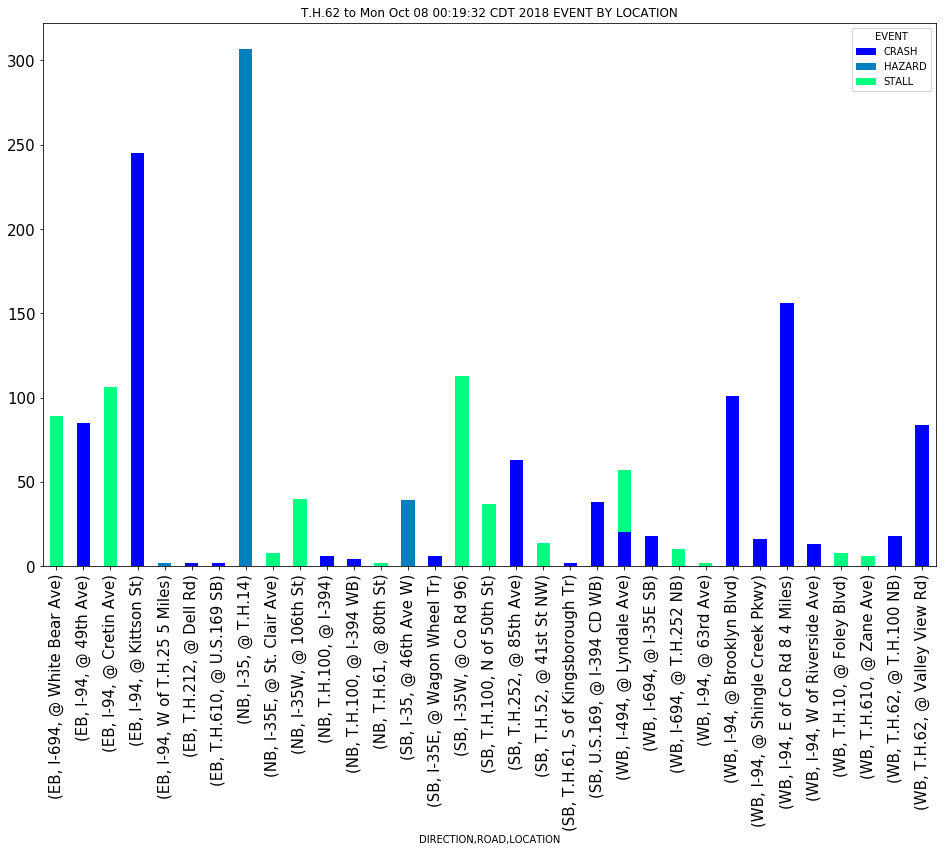

In [27]:
###########################################################################
# Incident counts for twin cities 10/8/18
###########################################################################

Omit_ROADWORK_Crash_Data_df = Crash_Data_df.loc[Crash_Data_df["EVENT"] != "ROADWORK", :]

group_by_direction_by_event = Omit_ROADWORK_Crash_Data_df.groupby(['DIRECTION','ROAD','LOCATION','EVENT'])

group_by_direction_by_event=group_by_direction_by_event.size().unstack()

group_by_direction_by_event.plot(kind='bar', title=(f'{d_min} to {d_max} EVENT BY LOCATION'), fontsize=15, figsize=[16,10], stacked=True, colormap='winter') # area plot
plt.savefig("Images/Crash_Hazards_Stalls_by_Location_Count.png")

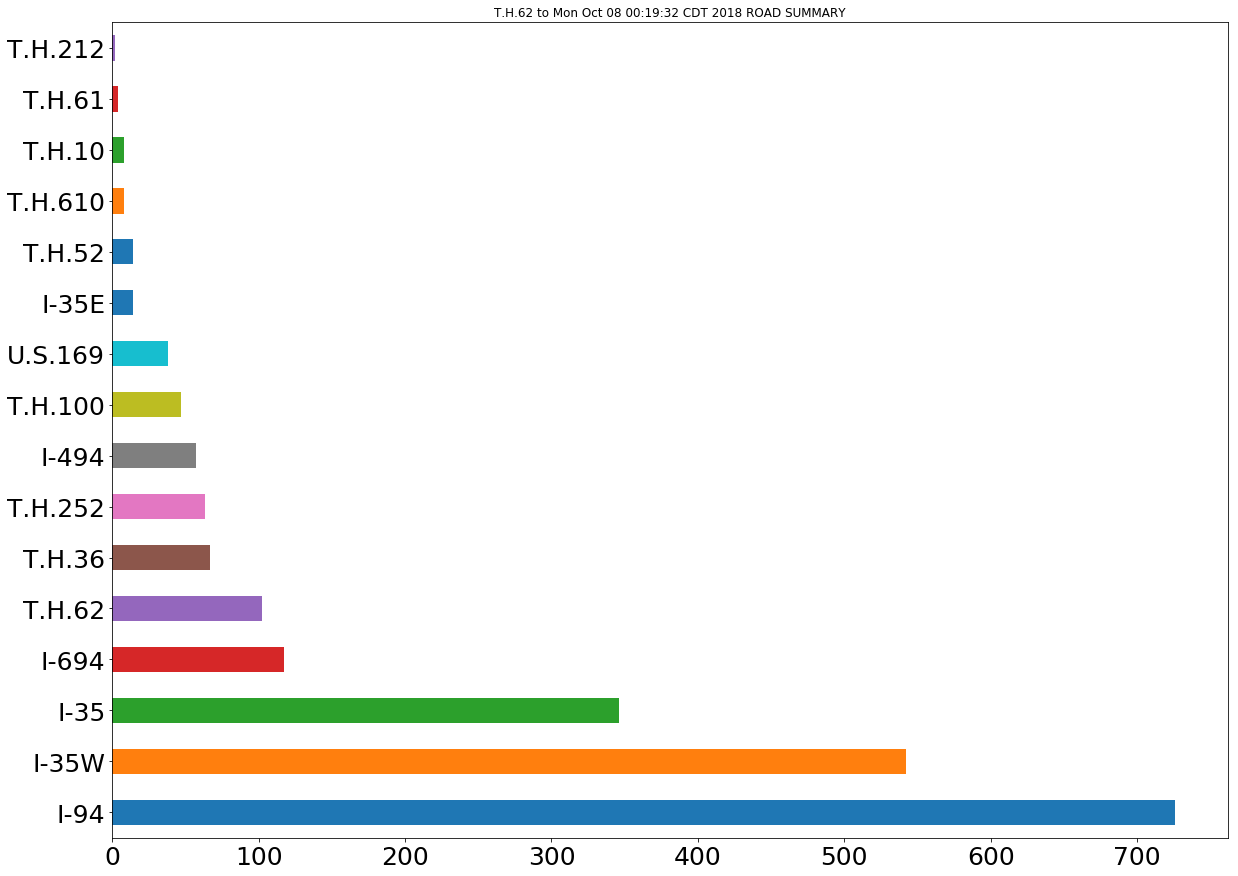

In [28]:
###########################################################################
# Roadwork Counts for twin cities
###########################################################################

fontsize2use = 25

fontprop = fm.FontProperties(size=fontsize2use)
fig = plt.figure(figsize=(20,15))
plt.xticks(fontsize=fontsize2use)  
plt.yticks(fontsize=fontsize2use)

Crash_Data_df['ROAD'].value_counts().plot(kind='barh',title=(f'{d_min} to {d_max} ROAD SUMMARY'))

plt.savefig("Images/Crash_Hazards_Stalls_by_Road_Count.png")

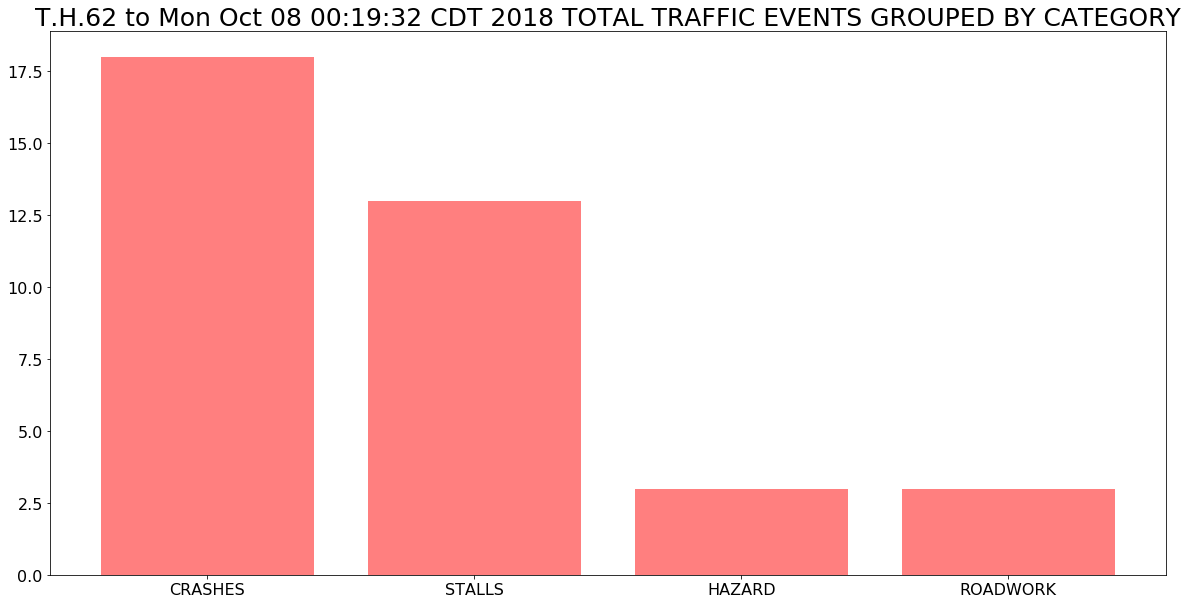

In [29]:
###########################################################################
# Grouped Incident Counts for HWY 62
###########################################################################

#Filter Event Data for Evenet Summary Chart and Count the Events
Crash_Event = Crash_Data_df.loc[Crash_Data_df["EVENT"] == "CRASH", :]
grouped_Crash_Event = Crash_Event.groupby(['ROAD','LOCATION','DIRECTION'])
grouped_Crash_Event = pd.DataFrame(grouped_Crash_Event["EVENT"].count())
Total_CRASHES=len(grouped_Crash_Event)

Hazard_Event = Crash_Data_df.loc[Crash_Data_df["EVENT"] == "HAZARD", :]
grouped_Hazard_Event = Hazard_Event.groupby(['ROAD','LOCATION','DIRECTION'])
grouped_Hazard_Event = pd.DataFrame(grouped_Hazard_Event["EVENT"].count())
Total_HAZARDS=len(grouped_Hazard_Event)

Roadwork_Event = Crash_Data_df.loc[Crash_Data_df["EVENT"] == "ROADWORK", :]
grouped_Roadwork_Event =Roadwork_Event.groupby(['ROAD','LOCATION','DIRECTION'])
grouped_Roadwork_Event = pd.DataFrame(grouped_Roadwork_Event["EVENT"].count())
Total_ROADWORK=len(grouped_Roadwork_Event)

Stall_Event = Crash_Data_df.loc[Crash_Data_df["EVENT"] == "STALL", :]
grouped_Stall_Event =Stall_Event.groupby(['ROAD','LOCATION','DIRECTION'])
grouped_Stall_Event = pd.DataFrame(grouped_Stall_Event["EVENT"].count())
Total_STALLS=len(grouped_Stall_Event)

# use matplotlib to make a bar chart
EVENTS=["CRASHES", "STALLS", "HAZARD", "ROADWORK"]
Event_COUNT=[Total_CRASHES,Total_STALLS,Total_HAZARDS,Total_ROADWORK]

fontsize2use = 16
fontsize3use = 25

fig = plt.figure(figsize=(20,10))
plt.xticks(fontsize=fontsize2use)  
plt.yticks(fontsize=fontsize2use)    
fontprop = fm.FontProperties(size=fontsize2use)

plt.title((f'{d_min} to {d_max} TOTAL TRAFFIC EVENTS GROUPED BY CATEGORY') ,fontsize=fontsize3use)

plt.bar(EVENTS,Event_COUNT, color=('r'), alpha=0.5, align="center")
    
plt.savefig("Images/Crash_By_Event.png")
plt.show()

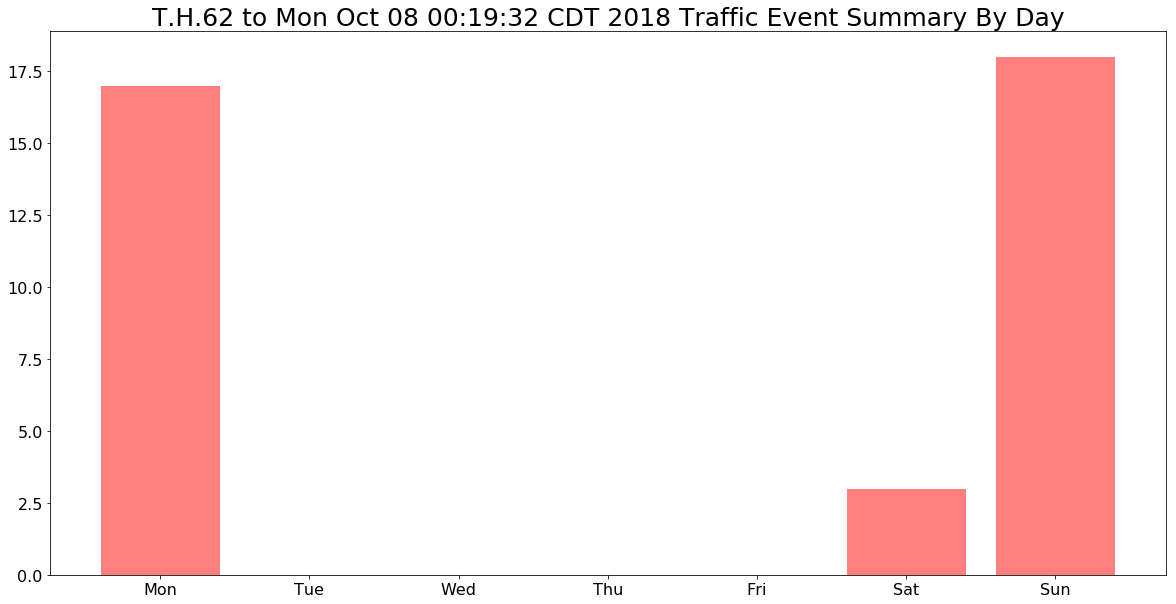

In [30]:
Roadwork_Event = Crash_Data_df.loc[Crash_Data_df["EVENT"] == "ROADWORK", :]
grouped_Roadwork_Event =Roadwork_Event.groupby(['ROAD','LOCATION','DIRECTION'])
grouped_Roadwork_Event = pd.DataFrame(grouped_Roadwork_Event["EVENT"].count())
Total_ROADWORK=len(grouped_Roadwork_Event)

#Filter Event Data for Evenet Summary Chart and Count the Events
Crash_Event_Mon = Crash_Data_df.loc[Crash_Data_df["DAY"] == "Mon", :]
grouped_Crash_Event_Mon = Crash_Event_Mon.groupby(['ROAD','LOCATION','DIRECTION'])
grouped_Crash_Event_Mon = pd.DataFrame(grouped_Crash_Event_Mon["EVENT"].count())
Total_Mon_CRASHES=len(grouped_Crash_Event_Mon)

Crash_Event_Tue = Crash_Data_df.loc[Crash_Data_df["DAY"] == "Tue", :]
grouped_Crash_Event_Tue = Crash_Event_Tue.groupby(['ROAD','LOCATION','DIRECTION'])
grouped_Crash_Event_Tue = pd.DataFrame(grouped_Crash_Event_Tue["EVENT"].count())
Total_Tue_CRASHES=len(grouped_Crash_Event_Tue)

Crash_Event_Wed = Crash_Data_df.loc[Crash_Data_df["DAY"] == "Wed", :]
grouped_Crash_Event_Wed = Crash_Event_Wed.groupby(['ROAD','LOCATION','DIRECTION'])
grouped_Crash_Event_Wed = pd.DataFrame(grouped_Crash_Event_Wed["EVENT"].count())
Total_Wed_CRASHES=len(grouped_Crash_Event_Wed)

Crash_Event_Thu = Crash_Data_df.loc[Crash_Data_df["DAY"] == "Thu", :]
grouped_Crash_Event_Thu = Crash_Event_Thu.groupby(['ROAD','LOCATION','DIRECTION'])
grouped_Crash_Event_Thu = pd.DataFrame(grouped_Crash_Event_Thu["EVENT"].count())
Total_Thu_CRASHES=len(grouped_Crash_Event_Thu)

Crash_Event_Fri = Crash_Data_df.loc[Crash_Data_df["DAY"] == "Fri", :]
grouped_Crash_Event_Fri = Crash_Event_Fri.groupby(['ROAD','LOCATION','DIRECTION'])
grouped_Crash_Event = pd.DataFrame(grouped_Crash_Event_Fri["EVENT"].count())
Total_Fri_CRASHES=len(grouped_Crash_Event_Fri)

Crash_Event_Sat = Crash_Data_df.loc[Crash_Data_df["DAY"] == "Sat", :]
grouped_Crash_Event_Sat = Crash_Event_Sat.groupby(['ROAD','LOCATION','DIRECTION'])
grouped_Crash_Event_Sat = pd.DataFrame(grouped_Crash_Event_Sat["EVENT"].count())
Total_Sat_CRASHES=len(grouped_Crash_Event_Sat)

Crash_Event_Sun = Crash_Data_df.loc[Crash_Data_df["DAY"] == "Sun", :]
grouped_Crash_Event_Sun = Crash_Event_Sun.groupby(['ROAD','LOCATION','DIRECTION'])
grouped_Crash_Event_Sun = pd.DataFrame(grouped_Crash_Event_Sun["EVENT"].count())
Total_Sun_CRASHES =len(grouped_Crash_Event_Sun)

# use matplotlib to make a bar chart of crash data by location
EVENTS_BY_DAY=["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]
Event_COUNT=[Total_Mon_CRASHES,Total_Tue_CRASHES,Total_Wed_CRASHES,
             Total_Thu_CRASHES,Total_Fri_CRASHES,Total_Sat_CRASHES,Total_Sun_CRASHES]

fontsize2use = 16
fontsize3use = 25

fig = plt.figure(figsize=(20,10))
plt.xticks(fontsize=fontsize2use)  
plt.yticks(fontsize=fontsize2use)    
fontprop = fm.FontProperties(size=fontsize2use)

plt.title((f'{d_min} to {d_max} Traffic Event Summary By Day') ,fontsize=fontsize3use)

plt.bar( EVENTS_BY_DAY,Event_COUNT, color=('r'), alpha=0.5, align="center")
  
plt.savefig("Images/Crash_By_Event_By_Day.png")

plt.show()

Crash count by days :2


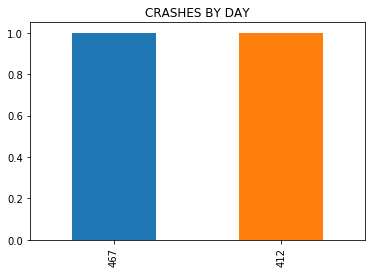

In [31]:
Crash_data_by_day = Crash_Data_df[Crash_Data_df['EVENT'] == 'CRASH']
Crash_count=Crash_data_by_day['DAY'].value_counts()
Crash_days=len(Crash_data_by_day['DAY'].value_counts())
print(f'Crash count by days :{Crash_days}')

Crash_data_by_day['DAY'].value_counts().value_counts().plot(kind='bar', title='CRASHES BY DAY')

plt.savefig("Images/Crash_Count_By_Day.png")


Roadwork count by days :2


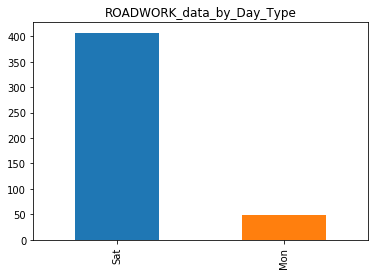

In [32]:
Roadwork_data_by_day= Crash_Data_df[Crash_Data_df['EVENT'] == 'ROADWORK']
Roadwork_Count=Roadwork_data_by_day['DAY'].value_counts()
Roadwork_days=len(Crash_data_by_day['DAY'].value_counts())
print(f'Roadwork count by days :{Roadwork_days}')


Roadwork_data_by_day['DAY'].value_counts().plot(kind='bar', title='ROADWORK_data_by_Day_Type')
plt.savefig("Images/Roadwork_Count_By_Day.png")

Stall count by days : 13


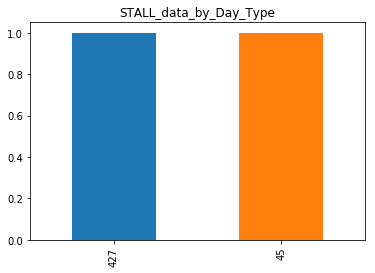

In [33]:
Stall_data_by_day= Crash_Data_df.loc[Crash_Data_df["EVENT"] == "STALL", :]
grouped_Stall_Event =Stall_Event.groupby(["ROAD","LOCATION","DIRECTION"])
grouped_Stall_Event = pd.DataFrame(grouped_Stall_Event["EVENT"].count())
Stall_days=len(grouped_Stall_Event)
print(f'Stall count by days : {Stall_days}')

Stall_data_by_day['DAY'].value_counts().value_counts().plot(kind='bar', title='STALL_data_by_Day_Type')
plt.savefig("Images/Stall_Count_By_Day.png")

Hazard count by days : 2


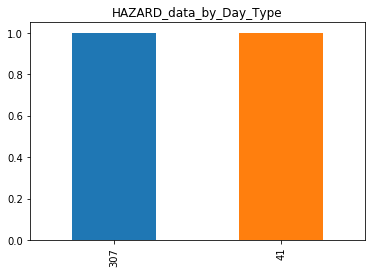

In [34]:
Hazard_data_by_day= Crash_Data_df[Crash_Data_df['EVENT'] == 'HAZARD']
Hazard_Count=Hazard_data_by_day['DAY'].value_counts()
Hazard_days=len(Crash_data_by_day['DAY'].value_counts())

print(f'Hazard count by days : {Hazard_days}')

Hazard_data_by_day['DAY'].value_counts().value_counts().plot(kind='bar', title='HAZARD_data_by_Day_Type')
plt.savefig("Images/Hazard_Count_By_Day.png")

# 35W Traffic Flow Analysis from 694 to 494


-  Read in csv files with historical information
-  Analysis of Northbound and Southbound AM/PM Rush Hour traffic counts (including ent, exits, and freeway)
-  Identify Entrances and Exits with highest volume of traffic

In [28]:
###########################################################################
# Read CSV Files
###########################################################################

# Sensor names, labels for SB 35W from 694 to 494
sensor_list = 'Station_Keys/Southbound_35W_StationNames.csv'
SensorList = pd.read_csv(sensor_list)
SensorDF = pd.DataFrame(SensorList)

# Oct_data from a single day showing SB 35W Traffic
oct_data = ('Archived_Data_MNDOT/SB35W_Oct_3_18_Volume_Sum_RushHours.csv')
Oct_cvs = pd.read_csv(oct_data)
OctDF = pd.DataFrame(Oct_cvs)

#Sensor names, labels for NB 35W from 494 to 694
nbsensor_list = 'Station_Keys/Northbound_35W_StationNames.csv'
nbSensorList = pd.read_csv(nbsensor_list)
NBSensorDF = pd.DataFrame(nbSensorList)

# Oct_data from a single day showing NB 35W Traffic
nboct_data = 'Archived_Data_MNDOT/NB35W_Oct_3_18_Volume_Sum_RushHours.csv'
nboct_csv = pd.read_csv(nboct_data)
NBOctDF = pd.DataFrame(nboct_csv)

mpls_csv = 'Station_Keys/MPLS_Route_StationNames.csv'
mpls_csvR = pd.read_csv(mpls_csv)
mpls_DF = pd.DataFrame(mpls_csvR)


mpls_data_csv = 'Archived_Data_MNDOT/MPLS_Entry_Exit_Volume_SpecificDates_2.csv'
dtypes = {'col1': 'str', 'col2': 'str', 'col3': 'str', 'col4': 'str', 'col5':'str', 'col6':'float', 'col7':'float'}
parse_dates = ['Date']
mpls_data = pd.read_csv(mpls_data_csv, sep=',', dtype=dtypes, parse_dates=parse_dates)
mpls_dataDF = pd.DataFrame(mpls_data)

###########################################################################
# Merge CSV Files to create South Bound 35W Data (SB_Data)
###########################################################################

#Merged SB 35W Data and Labels
SB_Data = pd.merge(SensorDF, OctDF, how = 'left', on = '1')

#Merged NB 35W Data and Labels
NB_Data = pd.merge(NBSensorDF, NBOctDF, how = 'left', on = '1')

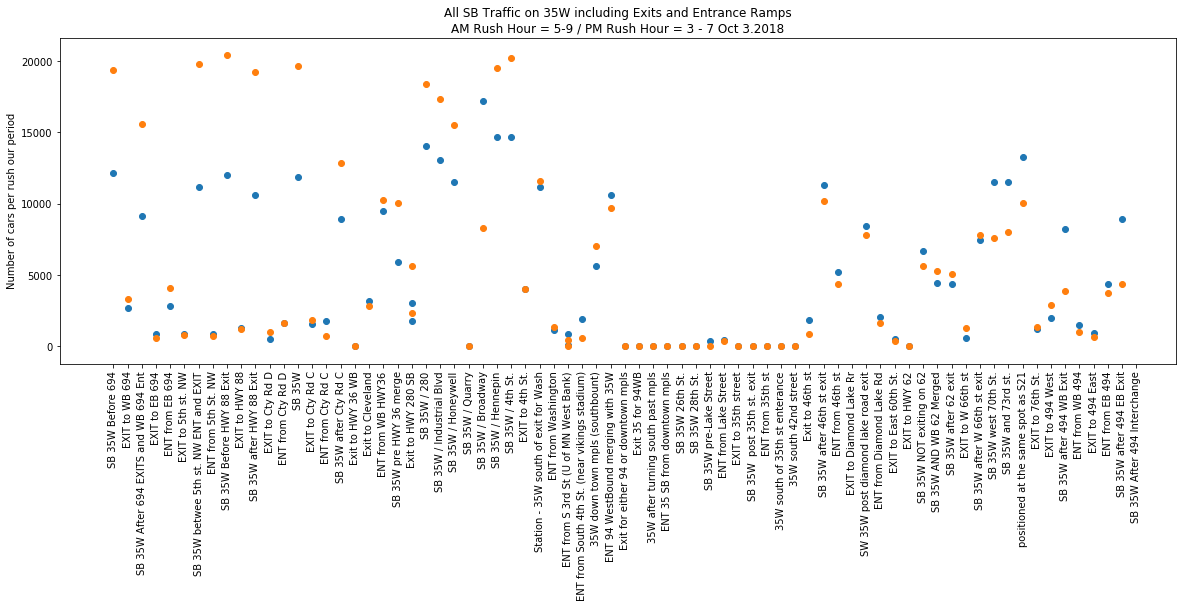

In [29]:
###########################################################################
# SOUTHBOUND TRAFFIC SHOWING FLOW, ON AND OFF RAMPS - Oct 3.2018
###########################################################################

y1 = SB_Data['AM Rush']
y2 = SB_Data['PM Rush']
X_Axis = SB_Data['Label']

# Figure Settings
plt.figure(figsize=(20,6))
plt.xticks(rotation=90)

# Figure Labels
plt.title("All SB Traffic on 35W including Exits and Entrance Ramps\nAM Rush Hour = 5-9 / PM Rush Hour = 3 - 7 Oct 3.2018")
plt.ylabel("Number of cars per rush our period")

# Scatter Plot
plt.scatter(X_Axis, y1)
plt.scatter(X_Axis, y2)

plt.show()

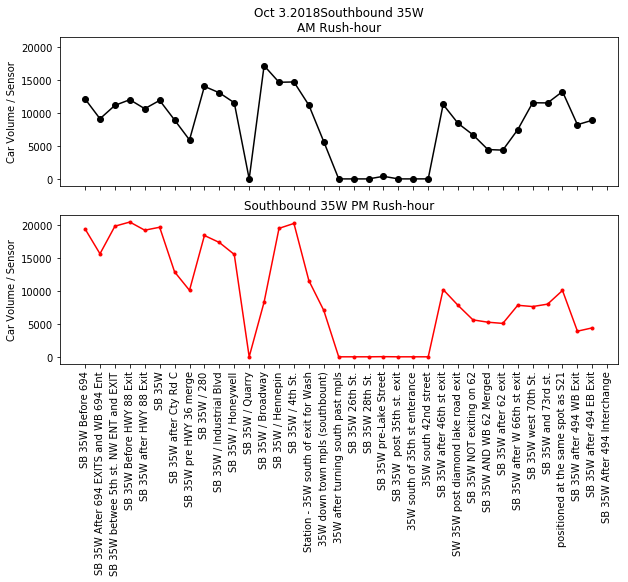

In [31]:
###########################################################################
# SOUTHBOUND 35W TRAFFIC - FLOW ONLY - Oct 3.2018
###########################################################################
SB35W_Flow = SB_Data.loc[SB_Data['Type']=='Flow']

# Inputs
y1 = SB35W_Flow ['AM Rush']
y2 = SB35W_Flow['PM Rush']
x1 = SB35W_Flow['Label']
x2 = SB35W_Flow['Label']

# Create two subplots sharing y axis
fig, (ax1, ax2) = plt.subplots(2, sharex = True, sharey=True, figsize=(10,6))

# AM Rush-hour
ax1.plot(x1, y1, 'ko-')
ax1.set(title='Oct 3.2018Southbound 35W\nAM Rush-hour', ylabel='Car Volume / Sensor')

# PM Rush-hour
ax2.plot(x2, y2, 'r.-')
ax2.set(title='Southbound 35W PM Rush-hour', ylabel='Car Volume / Sensor')

# Rotate xticks (reminder both images are sharing the X-axis labels)
plt.xticks(rotation=90)

plt.show()

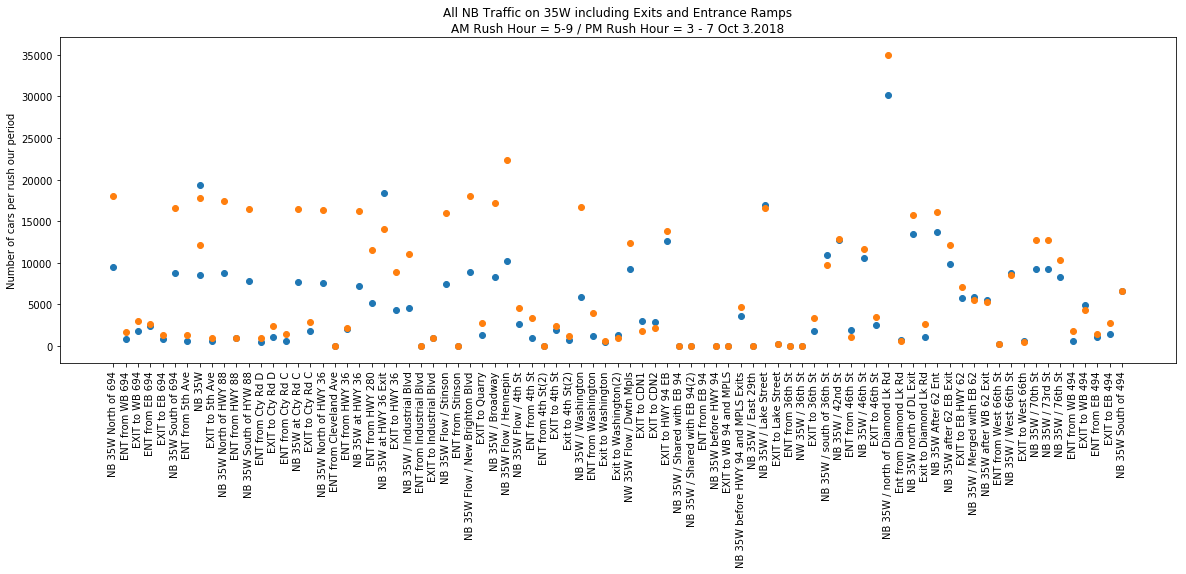

In [32]:
###########################################################################
# NORTHBOUND TRAFFIC SHOWING FLOW, ON AND OFF RAMPS - Oct 3.2018
###########################################################################

y1 = NB_Data['AM_RushHour']
y2 = NB_Data['PM_RushHour']
X_Axis = NB_Data['Label']

# Figure Settings
plt.figure(figsize=(20,6))
plt.xticks(rotation=90)

# Figure Labels
plt.title("All NB Traffic on 35W including Exits and Entrance Ramps\nAM Rush Hour = 5-9 / PM Rush Hour = 3 - 7 Oct 3.2018")
plt.ylabel("Number of cars per rush our period")

# Scatter Plot
plt.scatter(X_Axis, y1)
plt.scatter(X_Axis, y2)

plt.show()

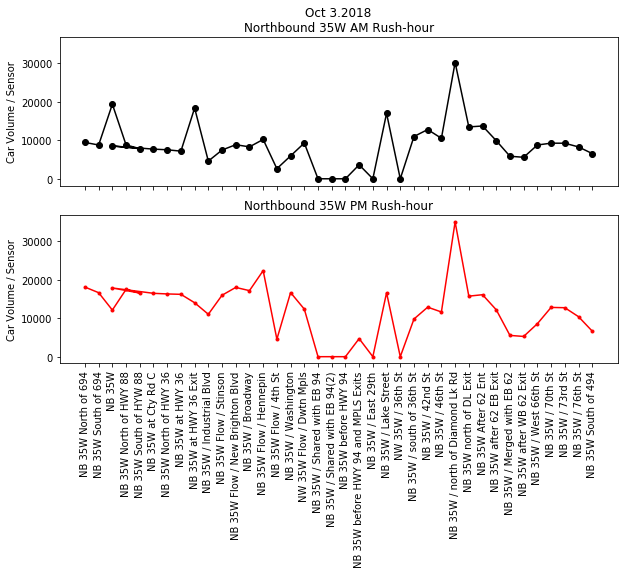

In [33]:
###########################################################################
# NORTHBOUND 35W TRAFFIC - FLOW ONLY - Oct 3.2018
###########################################################################

NB35W_Flow = NB_Data.loc[NB_Data['Type']=='Flow']

# Inputs
y1 = NB35W_Flow ['AM_RushHour']
y2 = NB35W_Flow['PM_RushHour']
x1 = NB35W_Flow['Label']
x2 = NB35W_Flow['Label']

# Create two subplots sharing y axis
fig, (ax1, ax2) = plt.subplots(2, sharex = True, sharey=True, figsize=(10,6))

# AM Rush-hour
ax1.plot(x1, y1, 'ko-')
ax1.set(title='Oct 3.2018\nNorthbound 35W AM Rush-hour', ylabel='Car Volume / Sensor')

# PM Rush-hour
ax2.plot(x2, y2, 'r.-')
ax2.set(title='Northbound 35W PM Rush-hour', ylabel='Car Volume / Sensor')

# Rotate xticks (reminder both images are sharing the X-axis labels)
plt.xticks(rotation=90)

plt.show()

In [34]:
###########################################################################
# Identify 35W Southbound EXITS WITH HIGHEST volume of traffic
###########################################################################

SB35W_Exits = SB_Data.loc[SB_Data['Type']!='Flow']
SB35W_ExitsDF = SB35W_Exits[['Label', 'Type', 'AM Rush']]
SB35W_ExitsHigh = SB35W_ExitsDF.sort_values(by='AM Rush', ascending=False).head(5)

SB35W_ExitsDFpm = SB35W_Exits[['Label', 'Type', 'PM Rush']]
SB35W_ExitsHighpm = SB35W_ExitsDFpm.sort_values(by='PM Rush', ascending=False).head(5)

display_side_by_side(SB35W_ExitsHigh, SB35W_ExitsHighpm)

,Label,Type,AM Rush
37,ENT 94 WestBound merging with 35W,On,10594.0
19,ENT from WB HWY36,On,9510.0
53,ENT from 46th st,On,5214.0
72,ENT from EB 494,On,4377.0
30,EXIT to 4th St.,Exit,4012.0
,Label,Type,PM Rush
19,ENT from WB HWY36,On,10265.0
37,ENT 94 WestBound merging with 35W,On,9691.0
22,Exit to HWY 280 SB,Exit,5616.0
53,ENT from 46th st,On,4369.0


In [35]:
###########################################################################
# Identify 35W Northbound EXITS WITH HIGHEST volume of traffic
###########################################################################

NB35W_Exits = NB_Data.loc[NB_Data['Type']!='Flow']
NB35W_ExitsDF = NB35W_Exits[['Label', 'Type', 'AM_RushHour']]
NB35W_ExitsHigh = NB35W_ExitsDF.sort_values(by='AM_RushHour', ascending=False).head(5)

NB35W_ExitsDFpm = NB35W_Exits[['Label', 'Type', 'PM_RushHour']]
NB35W_ExitsHighpm = NB35W_ExitsDFpm.sort_values(by='PM_RushHour', ascending=False).head(5)

display_side_by_side(NB35W_ExitsHigh, NB35W_ExitsHighpm)

,Label,Type,AM_RushHour
46,EXIT to HWY 94 EB,Exit,12572.0
70,EXIT to EB HWY 62,Exit,5771.0
22,ENT from HWY 280,On,5150.0
80,EXIT to WB 494,Exit,4990.0
24,EXIT to HWY 36,Exit,4317.0
,Label,Type,PM_RushHour
46,EXIT to HWY 94 EB,Exit,13824.0
22,ENT from HWY 280,On,11584.0
24,EXIT to HWY 36,Exit,8880.0
70,EXIT to EB HWY 62,Exit,7072.0


In [61]:
%%html
<center><img src="Images/MPLS_Entry_Exits_.PNG",width=600,height=600></center>
<strong>Samples of code used below<br>Static Visualizations in next slide<br>Widget Interactive Slides in following slide</strong>

In [68]:
###########################################################################
# Clean up data to determine route direction for mpls ent/exit analysis
###########################################################################

try:
    ls=[EE_df]
    del EE_df
    del ls
except  NameError:
     pass

EE_df=pd.read_csv("./Archived_Data_MNDOT/MPLS_Entry_Exit_Volume_SpecificDates.csv")

# len(EE_df)
# set(list(EE_df["Sensor"].values))
# EE_df.columns
def modi_Twins_Opener(x):
    try:
        if (x.split()[1]=="Twins")and(x.split()[2]=="Opener"):
            return '2018 Twins Opener'
        else:
            return x
    except:
        return x
            
    
EE_df["Event Label_2"]=EE_df["Event Label"].apply(modi_Twins_Opener);
EE_df.drop(columns=["Event Label"],inplace=True);
EE_df.rename(columns={"Event Label_2":"Event Label"},inplace=True);

#EE_df.set_index(["Event Label","Sensor"]);
def FromOrTodowntown(x):
    def fromto(y):
        if y=="from":
            return "out"
        else:
            return "in"
    return fromto(x.split()[-2])
def road(x):
    a=list(x.split())[0:2]
    return ' '.join(a[::-1])

EE_df["Direction(from/to)"]=EE_df["St Label"].apply(FromOrTodowntown);
EE_df["road"]=EE_df["St Label"].apply(road);

EE_df.head();
events=list(EE_df["Event Label"].unique());
events=list(EE_df["Event Label"].unique());

EE_df["sensor_name"]=EE_df["Sensor"]+'('+EE_df["road"]+")";
sensors=list(EE_df["sensor_name"].unique())

EE_df["name_sensor"]=EE_df["road"]+'('+EE_df[ "Sensor"]+")";


sensors=list(EE_df["sensor_name"].unique());
sensors2=list(EE_df["name_sensor"].unique());
len(events);
EE_df["sensor_fromto"]=EE_df["road"]+","+EE_df["Sensor"]+','+EE_df["Direction(from/to)"];
EE_df;

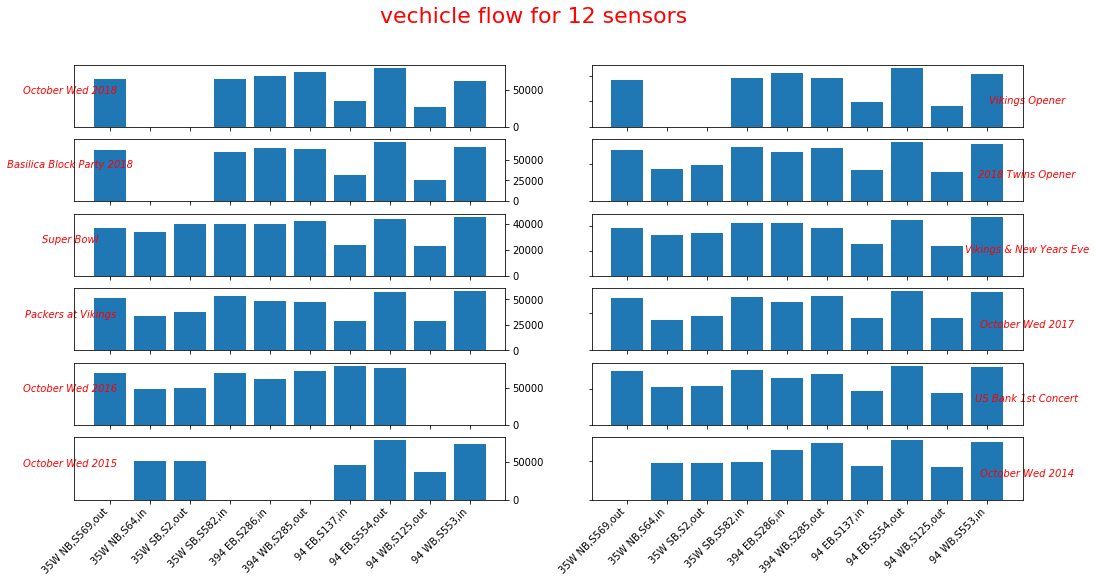

In [62]:
###########################################################################
# Data dump of all events and sensors for mpls ent/exit - Initial unsorted data
###########################################################################

def plot_flow_event_all(b,ax):
    Num_of_event=events.index(b)
    b1,b2=(int(Num_of_event/2),Num_of_event%2)
    aa=EE_df.groupby(["Event Label"]).get_group(b).sort_values(by="road");
    ax[b1,b2].bar(aa["Sensor"],aa["Volume"])
    ax[b1,b2].set_xticklabels(aa["sensor_fromto"],rotation=45,ha="right")
    if (b2==0):
        ax[b1,b2].yaxis.tick_right()
        ax[b1,b2].set_ylabel(b,rotation=45)
        
        box = ax[b1,b2].get_position()
        #ax[b1,b2].set_ylabel(b,rotation=45,fontstyle='oblique',position=(box.x0-box.width*0.4,box.y0))
        #ax[b1,b2].text(box.x0+box.width*0.4,box.y0,b,rotation=45,fontstyle='oblique')
        ax[b1,b2].set_ylabel(b,rotation=0,fontstyle='oblique')
        ax[b1,b2].yaxis.label.set_color('red')
    else:
        ax[b1,b2].set_yticklabels('')
        ax[b1,b2].yaxis.set_label_position("right")
        ax[b1,b2].set_ylabel(b,rotation=0,fontstyle='oblique')
        ax[b1,b2].yaxis.label.set_color('red')
    return None
fig, ax = plt.subplots(6,2,sharex='all',figsize=(17,8))

for b in events:
    plot_flow_event_all(b,ax)
title=fig.suptitle("vechicle flow for 12 sensors",fontsize=22,color="red")

# MPLS Ent/Exit DataFrames

In [70]:
###########################################################################
# Vikings 2018 Opener DF
###########################################################################

VikOpen_DF = mpls_dataDF.loc[mpls_dataDF['Event Label']=='Vikings Opener']
VikOpen = VikOpen_DF[['Volume', 'St Label', 'Direction', 'Freeway Tag']]
VikOpen_to = VikOpen.loc[VikOpen['Direction']=='To']
VikOpen_Tosorted = VikOpen_to.sort_values(by = 'Freeway Tag', ascending = True)

VikOpen_From = VikOpen.loc[VikOpen['Direction']=='From']
VikOpen_Fromsorted = VikOpen_From.sort_values(by='Freeway Tag', ascending = True)
display_side_by_side(VikOpen_Tosorted, VikOpen_Fromsorted)

,Volume,St Label,Direction,Freeway Tag
11,24578,EB 94 to dwtn,To,1
19,0,NB 35W to dwtn,To,2
14,53102,EB 394 to dwtn,To,3
15,52381,WB 94 to dwtn,To,4
18,47704,SB 35W to dwtn,To,5
,Volume,St Label,Direction,Freeway Tag
10,20129,WB 94 from dwtn,From,1
12,0,SB 35W from dwtn,From,2
13,48508,WB 394 from dwtn,From,3
16,58174,EB 94 from dwtn,From,4


In [71]:
###########################################################################
# Twins 2018 Opener DF
###########################################################################

TwinsOpen_DF = mpls_dataDF.loc[mpls_dataDF['Event Label']=='2018 Twins Opener']
TwinsOpen = TwinsOpen_DF[['Volume', 'St Label', 'Direction', 'Freeway Tag']]
TwinsOpen_to = TwinsOpen.loc[TwinsOpen['Direction']=='To']
TwinsOpen_Tosorted = TwinsOpen_to.sort_values(by = 'Freeway Tag', ascending = True)

TwinsOpen_From = TwinsOpen.loc[TwinsOpen['Direction']=='From']
TwinsOpen_Fromsorted = TwinsOpen_From.sort_values(by='Freeway Tag', ascending = True)
display_side_by_side(TwinsOpen_Tosorted, TwinsOpen_Fromsorted)

,Volume,St Label,Direction,Freeway Tag
31,41790,EB 94 to dwtn,To,1
39,42685,NB 35W to dwtn,To,2
34,65139,EB 394 to dwtn,To,3
35,76961,WB 94 to dwtn,To,4
38,71788,SB 35W to dwtn,To,5
,Volume,St Label,Direction,Freeway Tag
30,38549,WB 94 from dwtn,From,1
32,48561,SB 35W from dwtn,From,2
33,70696,WB 394 from dwtn,From,3
36,78710,EB 94 from dwtn,From,4


In [73]:
###########################################################################
# 2018 Basilica Block Party DF
###########################################################################

BasOpen_DF = mpls_dataDF.loc[mpls_dataDF['Event Label']=='Basilica Block Party 2018']
BasOpen = BasOpen_DF[['Volume', 'St Label', 'Direction', 'Freeway Tag']]
BasOpen_to = BasOpen.loc[BasOpen['Direction']=='To']
BasOpen_Tosorted = BasOpen_to.sort_values(by = 'Freeway Tag', ascending = True)

BasOpen_From = BasOpen.loc[BasOpen['Direction']=='From']
BasOpen_Fromsorted = BasOpen_From.sort_values(by='Freeway Tag', ascending = True)
display_side_by_side(BasOpen_Tosorted, BasOpen_Fromsorted)

,Volume,St Label,Direction,Freeway Tag
21,31014,EB 94 to dwtn,To,1
29,0,NB 35W to dwtn,To,2
24,63321,EB 394 to dwtn,To,3
25,65544,WB 94 to dwtn,To,4
28,59476,SB 35W to dwtn,To,5
,Volume,St Label,Direction,Freeway Tag
20,25242,WB 94 from dwtn,From,1
22,0,SB 35W from dwtn,From,2
23,62951,WB 394 from dwtn,From,3
26,70789,EB 94 from dwtn,From,4


In [100]:
###########################################################################
# 2018 Super Bowl DF
###########################################################################

SB_DF = mpls_dataDF.loc[mpls_dataDF['Event Label']=='Super Bowl']
SB = SB_DF[['Volume', 'St Label', 'Direction', 'Freeway Tag']]
SB_to = SB.loc[SB['Direction']=='To']
SB_Tosorted = SB_to.sort_values(by = 'Freeway Tag', ascending = True)

SB_From = SB.loc[SB['Direction']=='From']
SB_Fromsorted = SB_From.sort_values(by='Freeway Tag', ascending = True)
display_side_by_side(SB_Tosorted, SB_Fromsorted)

,Volume,St Label,Direction,Freeway Tag
41,23889,EB 94 to dwtn,To,1
49,33584,NB 35W to dwtn,To,2
44,39796,EB 394 to dwtn,To,3
45,45282,WB 94 to dwtn,To,4
48,39370,SB 35W to dwtn,To,5
,Volume,St Label,Direction,Freeway Tag
40,23119,WB 94 from dwtn,From,1
42,40015,SB 35W from dwtn,From,2
43,42013,WB 394 from dwtn,From,3
46,43300,EB 94 from dwtn,From,4


In [79]:
###########################################################################
# Packers at Vikings 10/15/2017 DF
###########################################################################

VikPak_DF = mpls_dataDF.loc[mpls_dataDF['Event Label']=='Packers at Vikings']
VikPak = VikPak_DF[['Volume', 'St Label', 'Direction', 'Freeway Tag']]
VikPak_to = VikPak.loc[VikPak['Direction']=='To']
VikPak_Tosorted = VikPak_to.sort_values(by = 'Freeway Tag', ascending = True)

VikPak_From = VikPak.loc[VikPak['Direction']=='From']
VikPak_Fromsorted = VikPak_From.sort_values(by='Freeway Tag', ascending = True)
display_side_by_side(VikPak_Tosorted, VikPak_Fromsorted)

,Volume,St Label,Direction,Freeway Tag
61,28958,EB 94 to dwtn,To,1
69,33427,NB 35W to dwtn,To,2
64,48752,EB 394 to dwtn,To,3
65,57976,WB 94 to dwtn,To,4
68,53712,SB 35W to dwtn,To,5
,Volume,St Label,Direction,Freeway Tag
60,28521,WB 94 from dwtn,From,1
62,37519,SB 35W from dwtn,From,2
63,47075,WB 394 from dwtn,From,3
66,57503,EB 94 from dwtn,From,4


In [99]:
###########################################################################
# Bears at Vikings AND New Years Eve DF
###########################################################################

BeaVik_DF = mpls_dataDF.loc[mpls_dataDF['Event Label']=='Vikings & New Years Eve']
BeaVik = BeaVik_DF[['Volume', 'St Label', 'Direction', 'Freeway Tag']]
BeaVik_to = BeaVik.loc[BeaVik['Direction']=='To']
BeaVik_Tosorted = BeaVik_to.sort_values(by = 'Freeway Tag', ascending = True)

BeaVik_From = BeaVik.loc[BeaVik['Direction']=='From']
BeaVik_Fromsorted = BeaVik_From.sort_values(by='Freeway Tag', ascending = True)
display_side_by_side(BeaVik_Tosorted, BeaVik_Fromsorted)

,Volume,St Label,Direction,Freeway Tag
51,25404,EB 94 to dwtn,To,1
59,32626,NB 35W to dwtn,To,2
54,43043,EB 394 to dwtn,To,3
55,47694,WB 94 to dwtn,To,4
58,42819,SB 35W to dwtn,To,5
,Volume,St Label,Direction,Freeway Tag
50,23930,WB 94 from dwtn,From,1
52,34825,SB 35W from dwtn,From,2
53,38610,WB 394 from dwtn,From,3
56,45208,EB 94 from dwtn,From,4


In [83]:
###########################################################################
# 1st Concert at US Bank Stadium 
###########################################################################

Concert_DF = mpls_dataDF.loc[mpls_dataDF['Event Label']=='US Bank 1st Concert']
Concert = Concert_DF[['Volume', 'St Label', 'Direction', 'Freeway Tag']]
Concert_to = Concert.loc[Concert['Direction']=='To']
Concert_Tosorted = Concert_to.sort_values(by = 'Freeway Tag', ascending = True)

Concert_From = Concert.loc[Concert['Direction']=='From']
Concert_Fromsorted = Concert_From.sort_values(by='Freeway Tag', ascending = True)
display_side_by_side(Concert_Tosorted, Concert_Fromsorted)

,Volume,St Label,Direction,Freeway Tag
91,46780,EB 94 to dwtn,To,1
99,52247,NB 35W to dwtn,To,2
94,64944,EB 394 to dwtn,To,3
95,79536,WB 94 to dwtn,To,4
98,75769,SB 35W to dwtn,To,5
,Volume,St Label,Direction,Freeway Tag
90,44617,WB 94 from dwtn,From,1
92,52966,SB 35W from dwtn,From,2
93,69939,WB 394 from dwtn,From,3
96,81195,EB 94 from dwtn,From,4


# MPLS Ent/Exit Static Visualizations

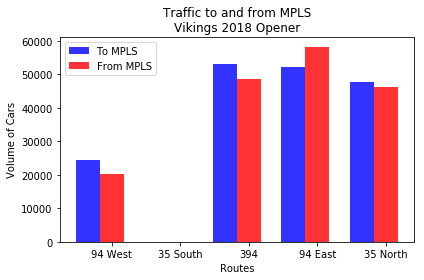

In [101]:
###########################################################################
# Vikings 2018 Opener Visualization
###########################################################################

n_groups = 5
VikOpen_trafficTo = list(VikOpen_Tosorted['Volume'])
VikOpen_TrafficFr = list(VikOpen_Fromsorted['Volume'])

fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8
rects1 = plt.bar(index, VikOpen_trafficTo, bar_width,
                alpha = opacity,
                color = 'b',
                label = 'To MPLS')
rects2 = plt.bar(index+bar_width, VikOpen_TrafficFr, bar_width,
                alpha = opacity,
                color = 'r',
                label = 'From MPLS')
plt.xlabel('Routes')
plt.ylabel('Volume of Cars')
plt.title('Traffic to and from MPLS\nVikings 2018 Opener')
plt.xticks(index + bar_width, ('94 West', '35 South', '394', '94 East', '35 North'))
plt.legend()
plt.tight_layout()
plt.show()

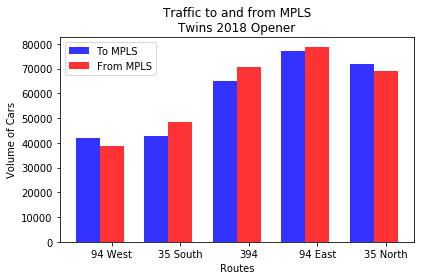

In [102]:
###########################################################################
# Twins 2018 Opener (FYI - Also their highest attended game of the entire year!)
###########################################################################

n_groups = 5
TwinsOpen_trafficTo = list(TwinsOpen_Tosorted['Volume'])
TwinsOpen_TrafficFr = list(TwinsOpen_Fromsorted['Volume'])

fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8
rects1 = plt.bar(index, TwinsOpen_trafficTo, bar_width,
                alpha = opacity,
                color = 'b',
                label = 'To MPLS')
rects2 = plt.bar(index+bar_width, TwinsOpen_TrafficFr, bar_width,
                alpha = opacity,
                color = 'r',
                label = 'From MPLS')
plt.xlabel('Routes')
plt.ylabel('Volume of Cars')
plt.title('Traffic to and from MPLS\nTwins 2018 Opener')
plt.xticks(index + bar_width, ('94 West', '35 South', '394', '94 East', '35 North'))
plt.legend()
plt.tight_layout()
plt.show()

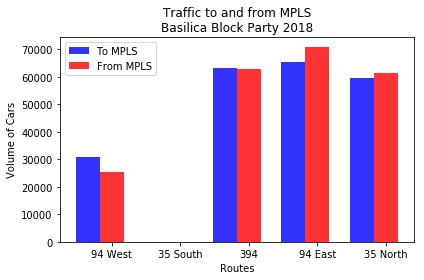

In [103]:
###########################################################################
# 2018 Basilica Block Party Visualization
###########################################################################

n_groups = 5
BasOpen_trafficTo = list(BasOpen_Tosorted['Volume'])
BasOpen_TrafficFr = list(BasOpen_Fromsorted['Volume'])

fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8
rects1 = plt.bar(index, BasOpen_trafficTo, bar_width,
                alpha = opacity,
                color = 'b',
                label = 'To MPLS')
rects2 = plt.bar(index+bar_width, BasOpen_TrafficFr, bar_width,
                alpha = opacity,
                color = 'r',
                label = 'From MPLS')
plt.xlabel('Routes')
plt.ylabel('Volume of Cars')
plt.title('Traffic to and from MPLS\nBasilica Block Party 2018')
plt.xticks(index + bar_width, ('94 West', '35 South', '394', '94 East', '35 North'))
plt.legend()
plt.tight_layout()
plt.show()

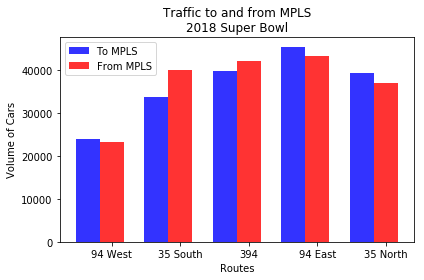

In [104]:
###########################################################################
# 2018 Super Bowl Visualization
###########################################################################

n_groups = 5
SB_trafficTo = list(SB_Tosorted['Volume'])
SB_TrafficFr = list(SB_Fromsorted['Volume'])

fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8
rects1 = plt.bar(index, SB_trafficTo, bar_width,
                alpha = opacity,
                color = 'b',
                label = 'To MPLS')
rects2 = plt.bar(index+bar_width, SB_TrafficFr, bar_width,
                alpha = opacity,
                color = 'r',
                label = 'From MPLS')
plt.xlabel('Routes')
plt.ylabel('Volume of Cars')
plt.title('Traffic to and from MPLS\n2018 Super Bowl')
plt.xticks(index + bar_width, ('94 West', '35 South', '394', '94 East', '35 North'))
plt.legend()
plt.tight_layout()
plt.show()

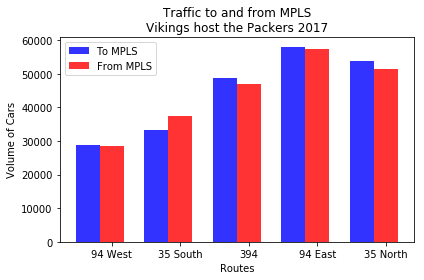

In [105]:
###########################################################################
# Packers at Vikings 10/15/2017 Visualization
###########################################################################

n_groups = 5
VikPak_trafficTo = list(VikPak_Tosorted['Volume'])
VikPak_TrafficFr = list(VikPak_Fromsorted['Volume'])

fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8
rects1 = plt.bar(index, VikPak_trafficTo, bar_width,
                alpha = opacity,
                color = 'b',
                label = 'To MPLS')
rects2 = plt.bar(index+bar_width, VikPak_TrafficFr, bar_width,
                alpha = opacity,
                color = 'r',
                label = 'From MPLS')
plt.xlabel('Routes')
plt.ylabel('Volume of Cars')
plt.title('Traffic to and from MPLS\nVikings host the Packers 2017')
plt.xticks(index + bar_width, ('94 West', '35 South', '394', '94 East', '35 North'))
plt.legend()
plt.tight_layout()
plt.show()

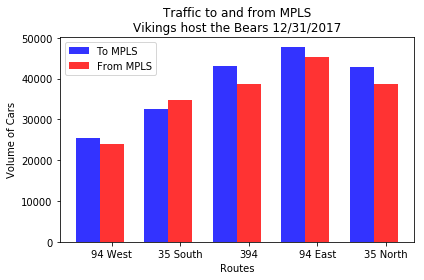

In [106]:
###########################################################################
# Bears at Vikings & News Years Eve 12/31/2017 Visualization
###########################################################################

n_groups = 5
BeaVik_trafficTo = list(BeaVik_Tosorted['Volume'])
BeaVik_TrafficFr = list(BeaVik_Fromsorted['Volume'])

fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8
rects1 = plt.bar(index, BeaVik_trafficTo, bar_width,
                alpha = opacity,
                color = 'b',
                label = 'To MPLS')
rects2 = plt.bar(index+bar_width, BeaVik_TrafficFr, bar_width,
                alpha = opacity,
                color = 'r',
                label = 'From MPLS')
plt.xlabel('Routes')
plt.ylabel('Volume of Cars')
plt.title('Traffic to and from MPLS\nVikings host the Bears 12/31/2017')
plt.xticks(index + bar_width, ('94 West', '35 South', '394', '94 East', '35 North'))
plt.legend()
plt.tight_layout()
plt.show()

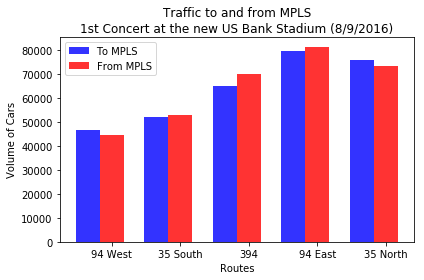

In [107]:
###########################################################################
# 1st Concert at US Bank Stadium (8/9/2016)
###########################################################################

n_groups = 5
Concert_trafficTo = list(Concert_Tosorted['Volume'])
Concert_TrafficFr = list(Concert_Fromsorted['Volume'])

fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8
rects1 = plt.bar(index, Concert_trafficTo, bar_width,
                alpha = opacity,
                color = 'b',
                label = 'To MPLS')
rects2 = plt.bar(index+bar_width, Concert_TrafficFr, bar_width,
                alpha = opacity,
                color = 'r',
                label = 'From MPLS')
plt.xlabel('Routes')
plt.ylabel('Volume of Cars')
plt.title('Traffic to and from MPLS\n1st Concert at the new US Bank Stadium (8/9/2016)')
plt.xticks(index + bar_width, ('94 West', '35 South', '394', '94 East', '35 North'))
plt.legend()
plt.tight_layout()
plt.show()

# MPLS Ent/Exit Interactive Visualizations

In [59]:
###########################################################################
#Interactive Visualizations for 10 different data sets
###########################################################################

sensor_out=["S2","S569","S285","S554","S125"]
sensor_in=["S64","S582","S286","S553","S137"]

def plot_flow_event(b):
    Num_of_event=events.index(b)
    aa=EE_df.groupby(["Event Label"]).get_group(b).sort_values(by="road");
    #aa=aa[aa["road"]=="35W"]
    aa.set_index("Sensor",inplace=True)
    sensors_in=aa.loc[sensor_in,"name_sensor"]
    sensors_out=aa.loc[sensor_out,"name_sensor"]
    flow_in=aa.loc[sensor_in,"Volume"]
    flow_out=aa.loc[sensor_out,"Volume"]
    
    
    fig, ax = plt.subplots(figsize=(15,5))
    opacity=0.8
    bar_width = 0.35
    index = np.arange(5)

    rects1 = plt.bar(index, flow_in, bar_width,
                alpha = opacity,
                color = 'b',
                label = 'To MPLS')
    rects2 = plt.bar(index+bar_width, flow_out, bar_width,
                alpha = opacity,
                color = 'r',
                label = 'From MPLS')

    print(index)
    print(sensors_in.values)
#     fig, ax = plt.subplots(figsize=(15,5))
#     ax.bar(aa["Sensor"],aa["Volume"])
    #ax.set_xticklabels(index,tuple(sensors_in.values))
    #plt.set_xticklabels(position=[(1.,0),(2.,0)],labels=["A","B"])
    #ax.set_xticklabels(index+bar_width,aa["sensor_fromto"],rotation=45,ha="right")
    
    #plt.set_ylabel("vehicle flow")
    #plt.set_title(f"Traffic to and from MPLS\n{b}")
    #plt.legend()
    
    plt.xlabel('Routes')
    plt.ylabel('Volume of Cars')
    plt.title(f"Traffic to and from MPLS\n{b}")
    plt.xticks(index + bar_width, ('35W_SB(in)', '35W_NB(in)', '394WB(in)', '94WB(in)', '94WB(in)'))
    plt.legend()
    return None
w1=dict(b=widgets.Dropdown(options=events,value=events[0],description='event',disabled=False))
output = interactive_output(plot_flow_event, w1)
box = VBox([*w1.values(), output])
display(box)
#plot_flow_event("October Wed 2018")

In [46]:
###########################################################################
# Unsorted (freeway paired) interactive data
###########################################################################

#https://github.com/jupyter-widgets/ipywidgets/issues/1582
from IPython.display import display
import numpy as np
from ipywidgets import *
import matplotlib.pyplot as plt

def plot_flow_event(b):
    Num_of_event=events.index(b)
    aa=EE_df.groupby(["Event Label"]).get_group(b).sort_values(by="road");
    #aa=aa[aa["road"]=="35W"]
    fig, ax = plt.subplots(figsize=(15,5))
    ax.bar(aa["Sensor"],aa["Volume"])
    ax.set_xticklabels(aa['road'])
    ax.set_ylabel("vehicle flow")
    ax.set_title(b)

w1=dict(b=widgets.Dropdown(options=events,value=events[0],description='event',disabled=False))

output = interactive_output(plot_flow_event, w1)
box = VBox([*w1.values(), output])
display(box)

In [69]:
###########################################################################
#Interactive Data unsorted(paired) for MPLS entry/exits
###########################################################################

def plot_flow_sensor(b):
    Num_of_sensor=sensors.index(b)
    aa=EE_df.groupby(["sensor_name"]).get_group(b).sort_values(by="Event Label");
    #aa=aa[aa["road"]=="35W"]
    fig, ax = plt.subplots(figsize=(15,3))
    ax.bar(aa["Event Label"],aa["Volume"])
    ax.set_xticklabels(aa["Event Label"],rotation=45,ha="right")
    ax.set_ylabel("vehicle flow")
    ax.set_title(b)

w2=dict(b=widgets.Dropdown(options=sensors,value=sensors[0],description='Sensor',disabled=False))

output = interactive_output(plot_flow_sensor, w2)
box = VBox([*w2.values(), output])
display(box)

# Conclusions

## -  The freeway entrances with the most inbound and outbound traffic from MPLS
####    -  35W North of MPLS
####    -  94 East of MPLS
####    -  394 West of MPLS

## - 35W Rush Hour Traffic
####    -  Based on the available sensors, HWY 94, HWY 36, HWY 280 and HWY 62 contribute the highest volume of traffic.
####    -  All 4 of those interchanges have a period of time that they are merged with 35W which impacts the vehicle speed.

## -  Ongoing Project Goals
-  Host bot on AWS (increased storage space and accessible tools for machine learning).
-  Now that we have our base functions established, we are going to increase the routes that we collect and analyze.
-  Collect weather (specifically precipitation) information and analyze how it impacts traffic flow and speed.
-  Sent tweets with specific hashtags for incidents occuring on specific routes.